In [1]:
import yfinance as yf
tacc = yf.Ticker("TACC.BK")

historical_data = tacc.history(start="2013-01-01", end="2023-12-31")

print(historical_data)


                               Open      High       Low     Close     Volume  \
Date                                                                           
2015-12-02 00:00:00+07:00  2.569936  2.755395  2.384477  2.384477  531444200   
2015-12-03 00:00:00+07:00  2.318241  2.357983  2.119535  2.212265   78881500   
2015-12-04 00:00:00+07:00  2.172523  2.848125  2.159276  2.742148  236653800   
2015-12-08 00:00:00+07:00  2.808384  3.298527  2.808384  3.086573  299120100   
2015-12-09 00:00:00+07:00  3.219043  3.258785  2.993843  3.139561  123185200   
...                             ...       ...       ...       ...        ...   
2023-12-22 00:00:00+07:00  4.089735  4.108240  4.034218  4.071229     768600   
2023-12-25 00:00:00+07:00  4.071229  4.089735  4.052723  4.071229     669700   
2023-12-26 00:00:00+07:00  4.071229  4.089734  4.052723  4.089734     615700   
2023-12-27 00:00:00+07:00  4.089735  4.108240  3.997207  4.071229    1771400   
2023-12-28 00:00:00+07:00  4.052723  4.0

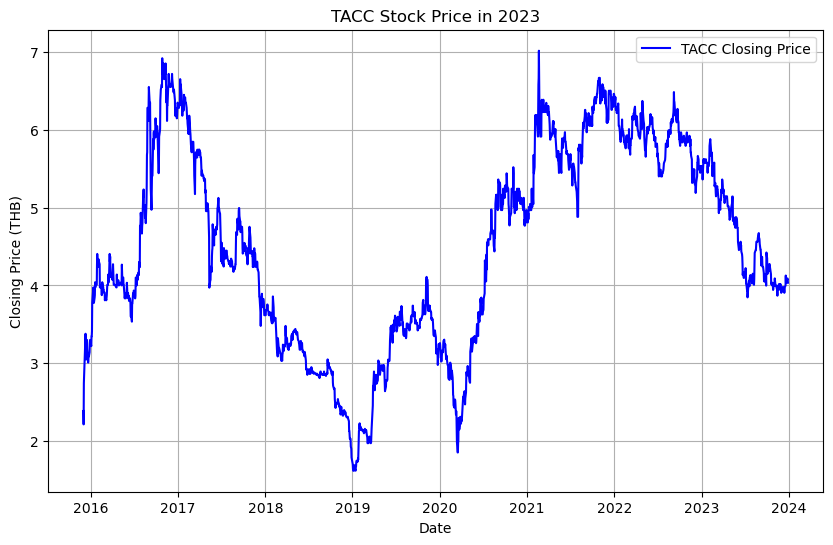

In [64]:
import yfinance as yf
import matplotlib.pyplot as plt

tacc = yf.Ticker("TACC.BK")

historical_data = tacc.history(start="2013-01-01", end="2023-12-31")


plt.figure(figsize=(10, 6))
plt.plot(historical_data.index, historical_data['Close'], label='TACC Closing Price', color='blue')


plt.title('TACC Stock Price in 2023')
plt.xlabel('Date')
plt.ylabel('Closing Price (THB)')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed

Price          Close
Ticker       TACC.BK
Date                
2015-12-02  2.384477
2015-12-03  2.212265
2015-12-04  2.742148
2015-12-08  3.086573
2015-12-09  3.139561


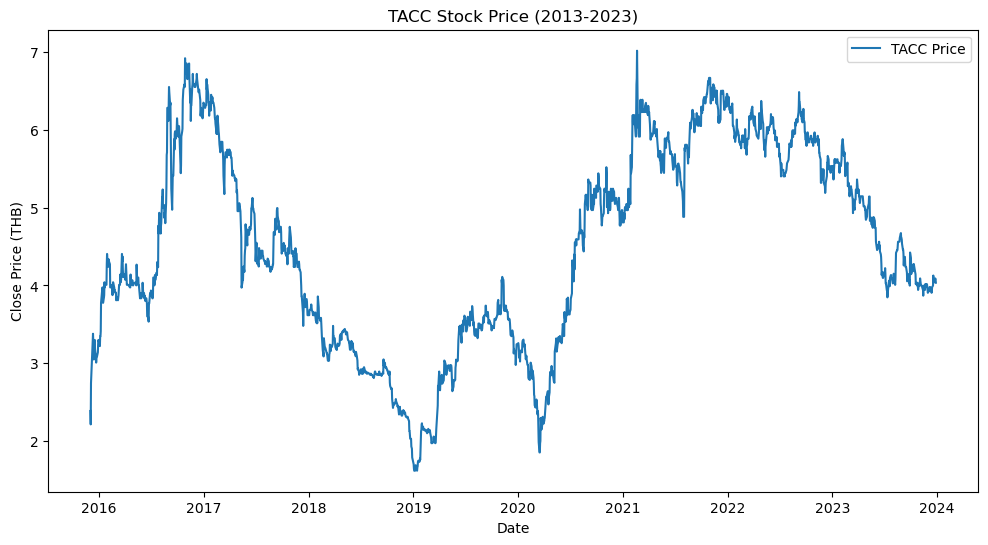

In [66]:
import yfinance as yf
import pandas as pd

ticker = "TACC.BK"
data = yf.download(ticker, start="2013-01-01", end="2023-12-31")


data = data[['Close']].dropna()

print(data.head())


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="TACC Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.title("TACC Stock Price (2013-2023)")
plt.legend()
plt.show()


In [69]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ดึงข้อมูล
ticker = "TACC.BK"
data = yf.download(ticker, start="2013-01-01", end="2023-12-31")

# ใช้ราคาปิด
data = data[['Close']].dropna()

# สร้างฟีเจอร์ Moving Averages
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)  # ลบค่า NaN


[*********************100%***********************]  1 of 1 completed


In [71]:
from sklearn.model_selection import train_test_split

# ใช้ข้อมูลก่อนปี 2023 เป็น Train / หลังจากนั้นเป็น Test
train = data[:'2022']
test = data['2023':]

X_train, y_train = train.drop(columns=['Close']), train['Close']
X_test, y_test = test.drop(columns=['Close']), test['Close']


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
print(f"MAPE - Linear Regression: {mape_lr:.4f}")


MAPE - Linear Regression: 0.0399


In [75]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print(f"MAPE - Random Forest: {mape_rf:.4f}")


MAPE - Random Forest: 0.0898


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [77]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
print(f"MAPE - XGBoost: {mape_xgb:.4f}")


MAPE - XGBoost: 0.0956


In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape ข้อมูลสำหรับ LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

# สร้างโมเดล LSTM
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=20, verbose=1)

y_pred_lstm = model.predict(X_test_lstm)

mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm)
print(f"MAPE - LSTM: {mape_lstm:.4f}")


Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.0755 
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1066
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4735
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3915
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3109
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2453
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2238
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1964
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1903
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2026
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1979
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1822
Epoch 13/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1849
Epoch 14/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1803
Epoch 15/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1686
Epoch 16/20
48/48 ━━━━━━━━━━

[*********************100%***********************]  1 of 1 completed
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


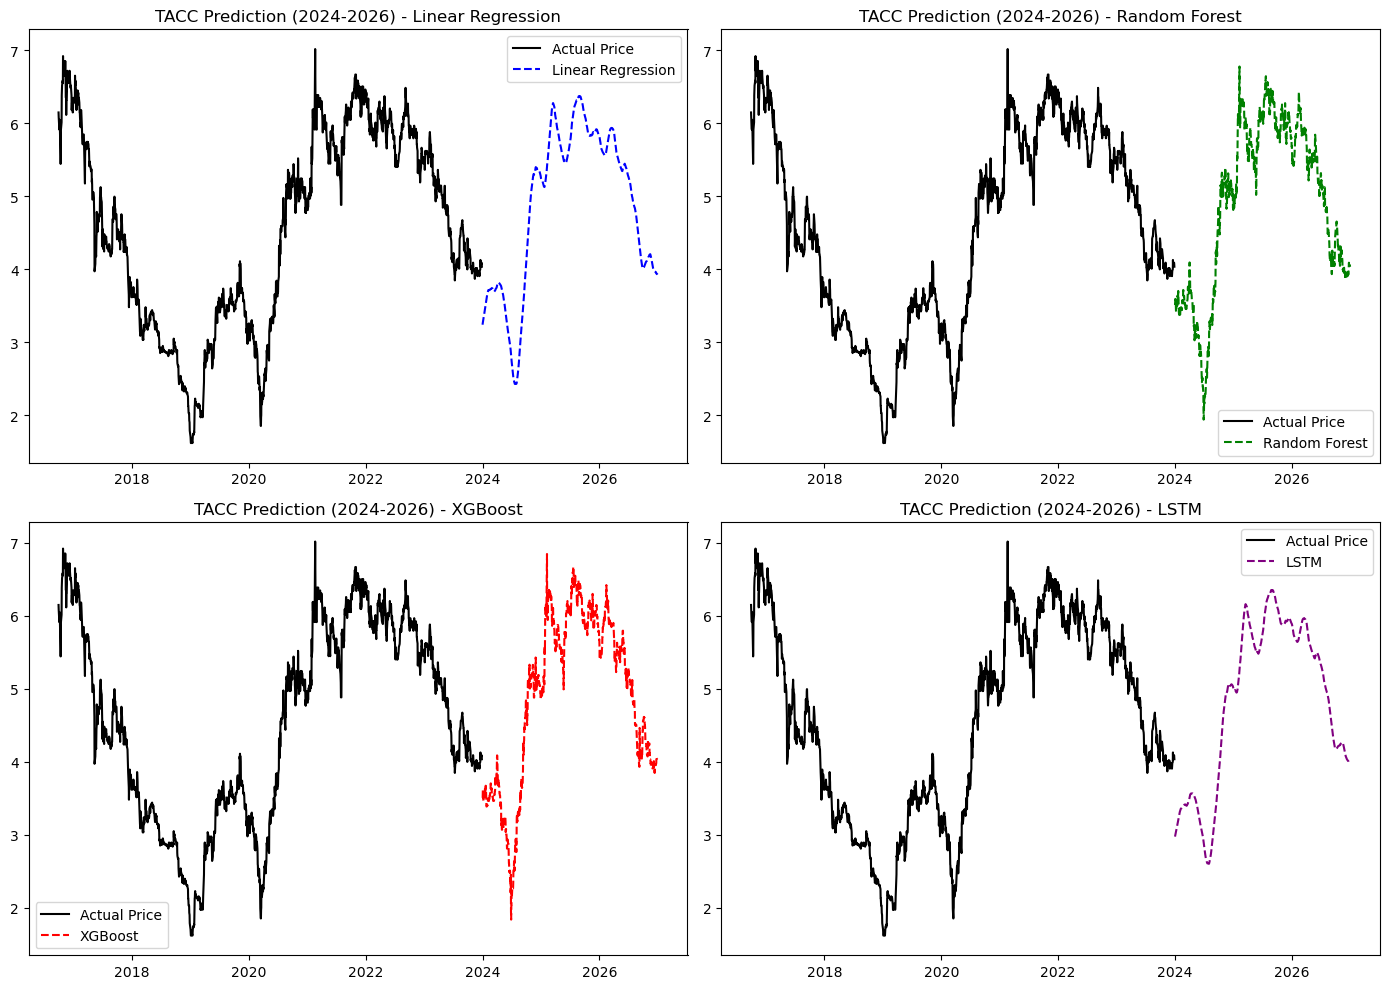

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# โหลดข้อมูลหุ้น
ticker = "TACC.BK"
data = yf.download(ticker, start="2013-01-01", end="2023-12-31")
data = data[['Close']].dropna()

# สร้างฟีเจอร์ Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# แบ่งข้อมูล Train/Test
train = data[:'2023']
X_train, y_train = train.drop(columns=['Close']), train['Close']

# ---------- เทรนโมเดล ----------

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=20, verbose=0)

# ---------- พยากรณ์ 2024-2026 ----------
future_dates = pd.date_range(start="2024-01-01", periods=1095, freq='D')
future_features = X_train.iloc[-1095:].values  # ใช้ข้อมูลล่าสุด

future_pred_lr = lr.predict(future_features)
future_pred_rf = rf.predict(future_features)
future_pred_xgb = xgb.predict(future_features)

future_features_lstm = np.array(future_features).reshape((future_features.shape[0], future_features.shape[1], 1))
future_pred_lstm = model.predict(future_features_lstm).flatten()

# ---------- พล็อตกราฟแยก ----------

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# กราฟ 1: Linear Regression
axes[0, 0].plot(data.index, data['Close'], label="Actual Price", color="black")
axes[0, 0].plot(future_dates, future_pred_lr, label="Linear Regression", linestyle="dashed", color="blue")
axes[0, 0].set_title("TACC Prediction (2024-2026) - Linear Regression")
axes[0, 0].legend()

# กราฟ 2: Random Forest
axes[0, 1].plot(data.index, data['Close'], label="Actual Price", color="black")
axes[0, 1].plot(future_dates, future_pred_rf, label="Random Forest", linestyle="dashed", color="green")
axes[0, 1].set_title("TACC Prediction (2024-2026) - Random Forest")
axes[0, 1].legend()

# กราฟ 3: XGBoost
axes[1, 0].plot(data.index, data['Close'], label="Actual Price", color="black")
axes[1, 0].plot(future_dates, future_pred_xgb, label="XGBoost", linestyle="dashed", color="red")
axes[1, 0].set_title("TACC Prediction (2024-2026) - XGBoost")
axes[1, 0].legend()

# กราฟ 4: LSTM
axes[1, 1].plot(data.index, data['Close'], label="Actual Price", color="black")
axes[1, 1].plot(future_dates, future_pred_lstm, label="LSTM", linestyle="dashed", color="purple")
axes[1, 1].set_title("TACC Prediction (2024-2026) - LSTM")
axes[1, 1].legend()

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step

📊 Confidence Score (% ความแม่นยำจากปี 2024):
Linear Regression: 96.33%
Random Forest: 85.96%
XGBoost: 85.66%
LSTM: 95.59%


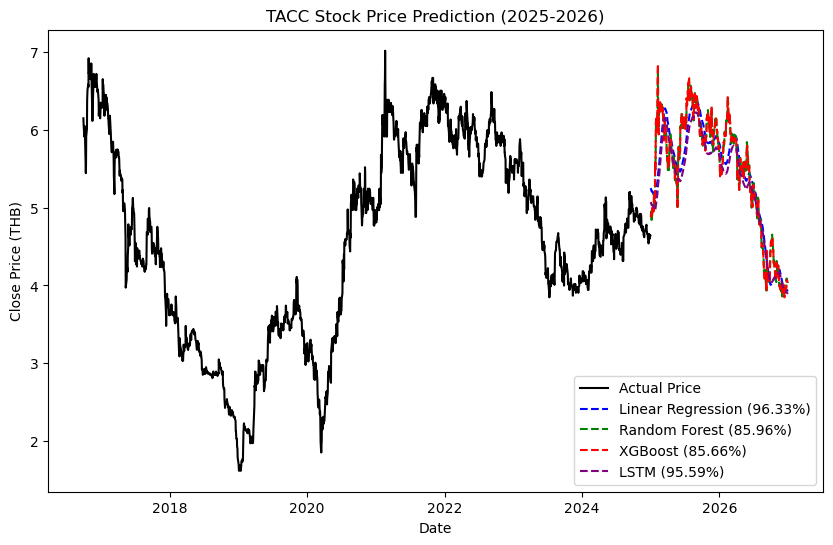

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# โหลดข้อมูลหุ้น (ถึงปี 2024)
ticker = "TACC.BK"
data = yf.download(ticker, start="2013-01-01", end="2024-12-31")
data = data[['Close']].dropna()

# สร้างฟีเจอร์ Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# แบ่งข้อมูล Train/Test
train = data[:'2023']
test = data['2024':]  # ใช้ปี 2024 เป็น Test Data

X_train, y_train = train.drop(columns=['Close']), train['Close']
X_test, y_test = test.drop(columns=['Close']), test['Close']

# ---------- เทรนโมเดล ----------
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=20, verbose=0)
y_pred_lstm = model.predict(X_test_lstm).flatten()

# ---------- คำนวณความแม่นยำ (MAPE) ----------
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm) * 100

confidence_scores = {
    "Linear Regression": 100 - mape_lr,
    "Random Forest": 100 - mape_rf,
    "XGBoost": 100 - mape_xgb,
    "LSTM": 100 - mape_lstm
}

# ---------- พยากรณ์ 2025-2026 ----------
future_dates = pd.date_range(start="2025-01-01", periods=730, freq='D')
future_features = X_train.iloc[-730:].values  # ใช้ข้อมูลล่าสุด

future_pred_lr = lr.predict(future_features)
future_pred_rf = rf.predict(future_features)
future_pred_xgb = xgb.predict(future_features)

future_features_lstm = np.array(future_features).reshape((future_features.shape[0], future_features.shape[1], 1))
future_pred_lstm = model.predict(future_features_lstm).flatten()

# ---------- แสดงผลเปอร์เซ็นต์ความมั่นใจ ----------
print("\n📊 Confidence Score (% ความแม่นยำจากปี 2024):")
for model, acc in confidence_scores.items():
    print(f"{model}: {acc:.2f}%")

# ---------- พล็อตกราฟ ----------
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(future_dates, future_pred_lr, label=f"Linear Regression ({confidence_scores['Linear Regression']:.2f}%)", linestyle="dashed", color="blue")
plt.plot(future_dates, future_pred_rf, label=f"Random Forest ({confidence_scores['Random Forest']:.2f}%)", linestyle="dashed", color="green")
plt.plot(future_dates, future_pred_xgb, label=f"XGBoost ({confidence_scores['XGBoost']:.2f}%)", linestyle="dashed", color="red")
plt.plot(future_dates, future_pred_lstm, label=f"LSTM ({confidence_scores['LSTM']:.2f}%)", linestyle="dashed", color="purple")

plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.title("TACC Stock Price Prediction (2025-2026)")
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step

📊 Confidence Score (% ความแม่นยำจากปี 2024):
Linear Regression: 96.33%
Random Forest: 85.96%
XGBoost: 85.66%
LSTM: 96.59%


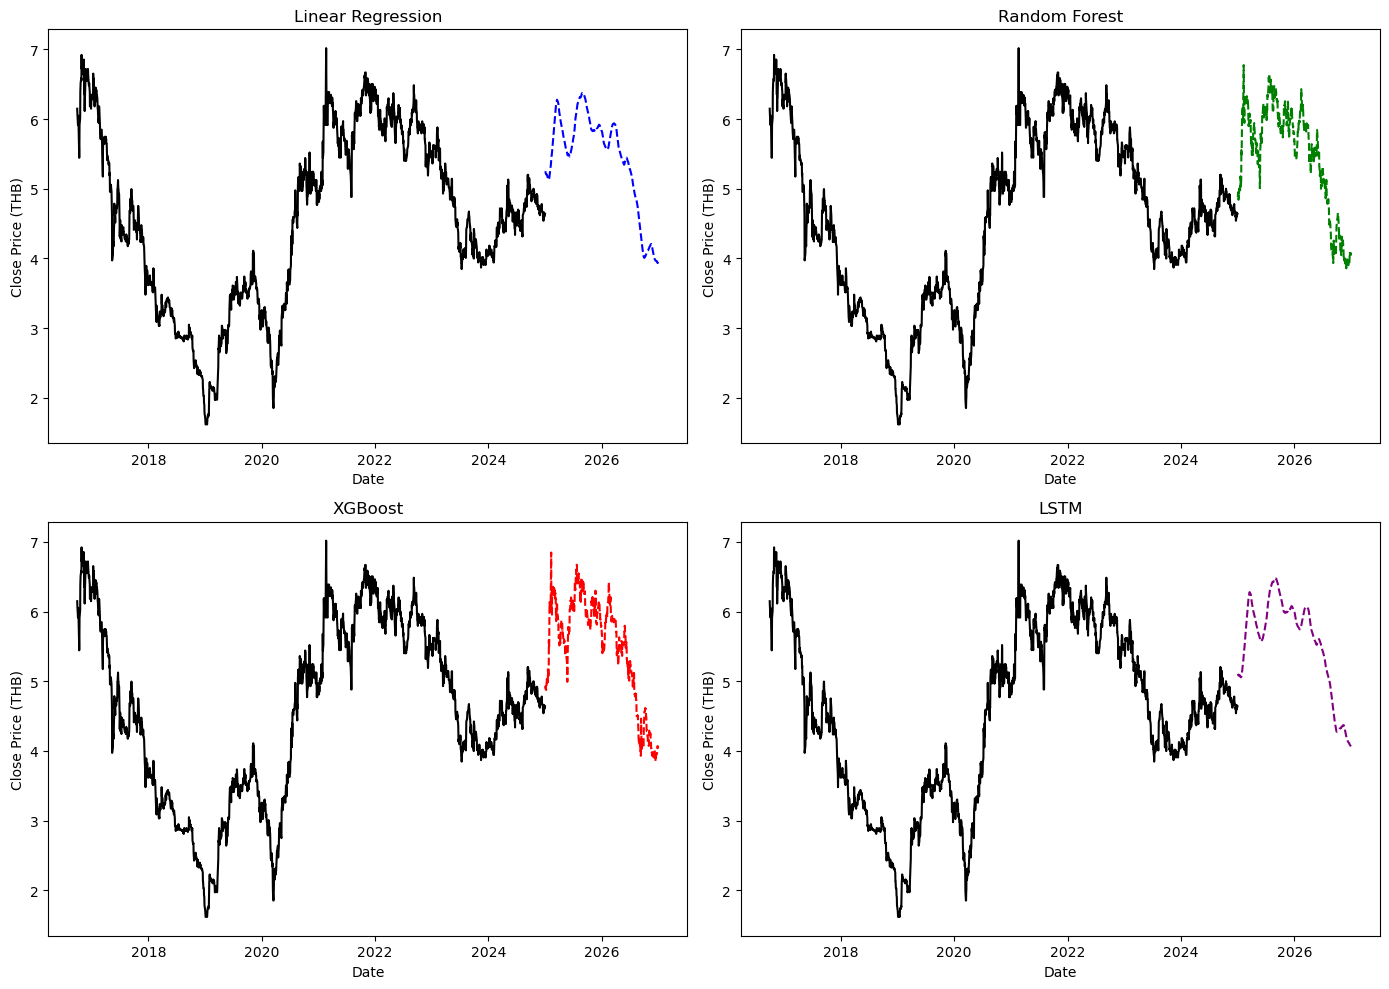

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# โหลดข้อมูลหุ้น (ถึงปี 2024)
ticker = "TACC.BK"
data = yf.download(ticker, start="2013-01-01", end="2024-12-31")
data = data[['Close']].dropna()

# สร้างฟีเจอร์ Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# แบ่งข้อมูล Train/Test
train = data[:'2023']
test = data['2024':]  # ใช้ปี 2024 เป็น Test Data

X_train, y_train = train.drop(columns=['Close']), train['Close']
X_test, y_test = test.drop(columns=['Close']), test['Close']

# ---------- เทรนโมเดล ----------
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=20, verbose=0)
y_pred_lstm = model.predict(X_test_lstm).flatten()

# ---------- คำนวณความแม่นยำ (MAPE) ----------
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm) * 100

confidence_scores = {
    "Linear Regression": 100 - mape_lr,
    "Random Forest": 100 - mape_rf,
    "XGBoost": 100 - mape_xgb,
    "LSTM": 100 - mape_lstm
}

# ---------- พยากรณ์ 2025-2026 ----------
future_dates = pd.date_range(start="2025-01-01", periods=730, freq='D')
future_features = X_train.iloc[-730:].values  # ใช้ข้อมูลล่าสุด

future_pred_lr = lr.predict(future_features)
future_pred_rf = rf.predict(future_features)
future_pred_xgb = xgb.predict(future_features)

future_features_lstm = np.array(future_features).reshape((future_features.shape[0], future_features.shape[1], 1))
future_pred_lstm = model.predict(future_features_lstm).flatten()

# ---------- แสดงผลเปอร์เซ็นต์ความมั่นใจ ----------
print("\n📊 Confidence Score (% ความแม่นยำจากปี 2024):")
for model, acc in confidence_scores.items():
    print(f"{model}: {acc:.2f}%")

# ---------- พล็อตกราฟแยกสำหรับแต่ละโมเดล ----------
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Linear Regression
axs[0, 0].plot(data.index, data['Close'], label="Actual Price", color="black")
axs[0, 0].plot(future_dates, future_pred_lr, label=f"Linear Regression ({confidence_scores['Linear Regression']:.2f}%)", linestyle="dashed", color="blue")
axs[0, 0].set_title("Linear Regression")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Close Price (THB)")

# Random Forest
axs[0, 1].plot(data.index, data['Close'], label="Actual Price", color="black")
axs[0, 1].plot(future_dates, future_pred_rf, label=f"Random Forest ({confidence_scores['Random Forest']:.2f}%)", linestyle="dashed", color="green")
axs[0, 1].set_title("Random Forest")
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("Close Price (THB)")

# XGBoost
axs[1, 0].plot(data.index, data['Close'], label="Actual Price", color="black")
axs[1, 0].plot(future_dates, future_pred_xgb, label=f"XGBoost ({confidence_scores['XGBoost']:.2f}%)", linestyle="dashed", color="red")
axs[1, 0].set_title("XGBoost")
axs[1, 0].set_xlabel("Date")
axs[1, 0].set_ylabel("Close Price (THB)")

# LSTM
axs[1, 1].plot(data.index, data['Close'], label="Actual Price", color="black")
axs[1, 1].plot(future_dates, future_pred_lstm, label=f"LSTM ({confidence_scores['LSTM']:.2f}%)", linestyle="dashed", color="purple")
axs[1, 1].set_title("LSTM")
axs[1, 1].set_xlabel("Date")
axs[1, 1].set_ylabel("Close Price (THB)")

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


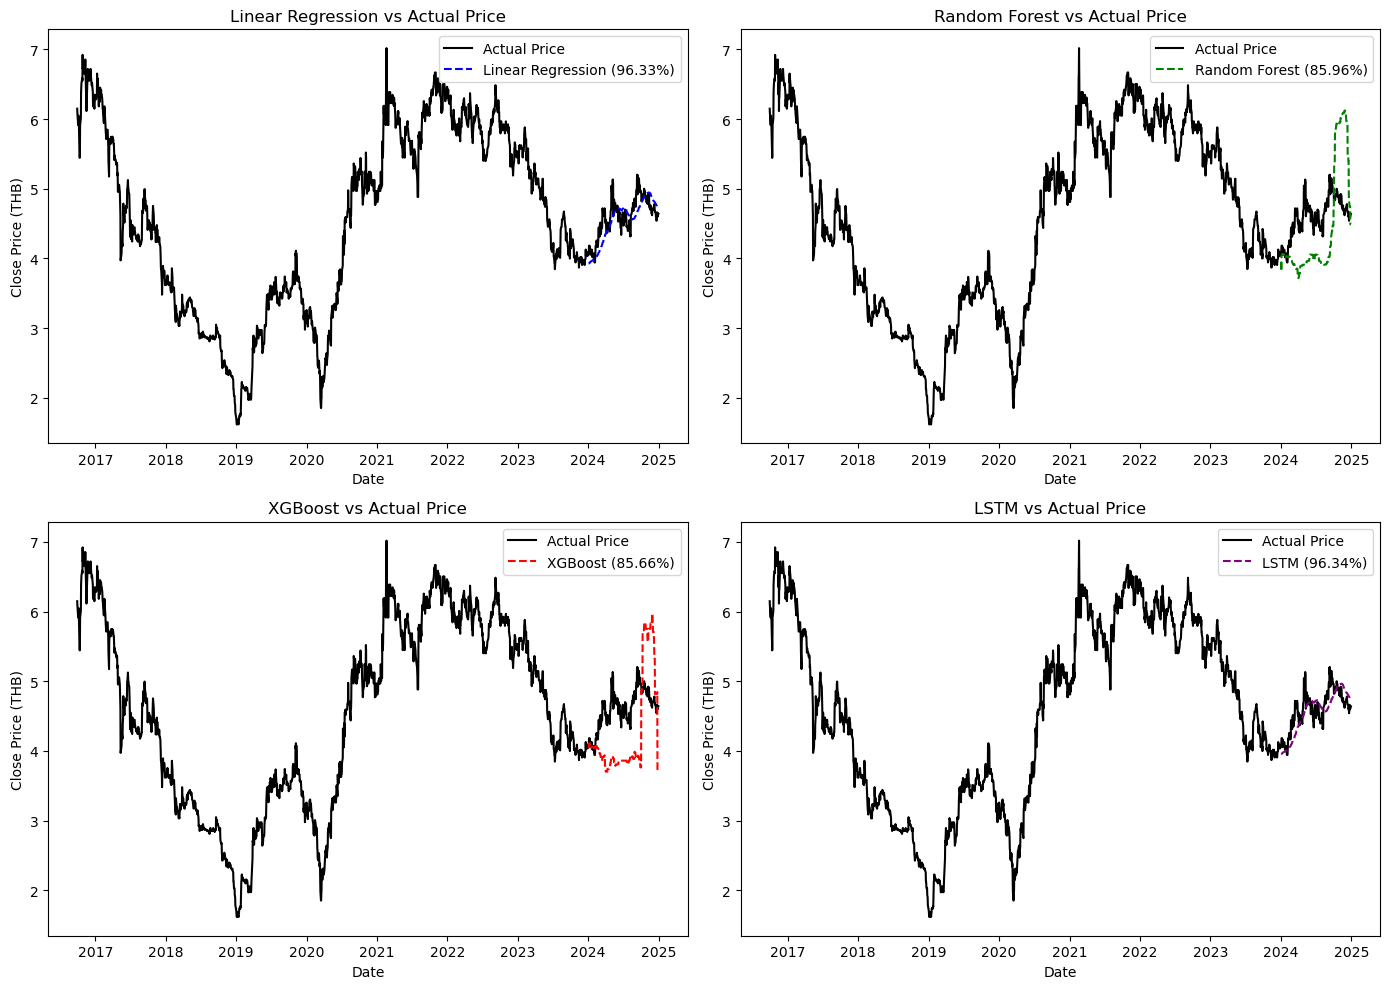

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# โหลดข้อมูลหุ้น (ถึงปี 2024)
ticker = "TACC.BK"
data = yf.download(ticker, start="2013-01-01", end="2024-12-31")
data = data[['Close']].dropna()

# สร้างฟีเจอร์ Moving Average
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)

# แบ่งข้อมูล Train/Test
train = data[:'2023']
test = data['2024':]  # ใช้ปี 2024 เป็น Test Data

X_train, y_train = train.drop(columns=['Close']), train['Close']
X_test, y_test = test.drop(columns=['Close']), test['Close']

# ---------- เทรนโมเดล ----------
lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# LSTM
X_train_lstm = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train, epochs=20, verbose=0)
y_pred_lstm = model.predict(X_test_lstm).flatten()

# ---------- คำนวณความแม่นยำ (MAPE) ----------
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) * 100
mape_lstm = mean_absolute_percentage_error(y_test, y_pred_lstm) * 100

confidence_scores = {
    "Linear Regression": 100 - mape_lr,
    "Random Forest": 100 - mape_rf,
    "XGBoost": 100 - mape_xgb,
    "LSTM": 100 - mape_lstm
}

# ---------- พยากรณ์ 2025-2026 ----------
future_dates = pd.date_range(start="2025-01-01", periods=730, freq='D')
future_features = X_train.iloc[-730:].values  # ใช้ข้อมูลล่าสุด

future_pred_lr = lr.predict(future_features)
future_pred_rf = rf.predict(future_features)
future_pred_xgb = xgb.predict(future_features)

future_features_lstm = np.array(future_features).reshape((future_features.shape[0], future_features.shape[1], 1))
future_pred_lstm = model.predict(future_features_lstm).flatten()

# ---------- พล็อตกราฟแยกสำหรับแต่ละโมเดลเทียบกับข้อมูลจริง ----------
plt.figure(figsize=(14, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lr, label=f"Linear Regression ({confidence_scores['Linear Regression']:.2f}%)", linestyle="dashed", color="blue")
plt.title("Linear Regression vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# Random Forest
plt.subplot(2, 2, 2)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_rf, label=f"Random Forest ({confidence_scores['Random Forest']:.2f}%)", linestyle="dashed", color="green")
plt.title("Random Forest vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# XGBoost
plt.subplot(2, 2, 3)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_xgb, label=f"XGBoost ({confidence_scores['XGBoost']:.2f}%)", linestyle="dashed", color="red")
plt.title("XGBoost vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

# LSTM
plt.subplot(2, 2, 4)
plt.plot(data.index, data['Close'], label="Actual Price", color="black")
plt.plot(test.index, y_pred_lstm, label=f"LSTM ({confidence_scores['LSTM']:.2f}%)", linestyle="dashed", color="purple")
plt.title("LSTM vs Actual Price")
plt.xlabel("Date")
plt.ylabel("Close Price (THB)")
plt.legend()

plt.tight_layout()
plt.show()


In [105]:
print("\n📊 Confidence Score (% ความแม่นยำจากปี 2024):")
for model, acc in confidence_scores.items():
    print(f"{model}: {acc:.2f}%")



📊 Confidence Score (% ความแม่นยำจากปี 2024):
Linear Regression: 96.33%
Random Forest: 85.96%
XGBoost: 85.66%
LSTM: 96.34%
